In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')

In [2]:
np.set_printoptions(suppress = True)

def normalization_Mnist(src) :
    
    dst = (src - src.min()) / (src.max() - src.min())
    
    return dst

def target_Mnist() :
    res = []
    
    for i in range(0, 10) :
        res.append(np.zeros(10))
        
        res[i][i] = 1;
    
    return res

In [3]:
import network

MLnetwork = network.network([784, 60, 10])

#初始化神经网络

tar = target_Mnist()

In [4]:
data = normalization_Mnist(mnist["data"])

target = mnist["target"]

training_data = data[0:50000]

test_data = data[50000:60000]

training_target = target[0:50000]

test_target = target[50000:60000]

In [5]:
result_fit = []

result_general = []

In [6]:
count = 0

for i in range(0, len(training_data)) :
    
    count += np.argmax(MLnetwork.feedForward(training_data[i])) == int(training_target[i])
    
result_fit.append(count / len(training_data))

count = 0

for i in range(0, len(test_data)) :
    
    count += np.argmax(MLnetwork.feedForward(test_data[i])) == int(test_target[i])
    
result_general.append(count / len(test_data))

反向传播区

In [7]:

for i in range(0, len(training_data)) :
    MLnetwork.backProp(training_data[i], tar[int(training_target[i])], 0.05, network.network.costFun.CEE, 0.0)

count = 0

for i in range(0, len(training_data)) :

    count += np.argmax(MLnetwork.feedForward(training_data[i])) == int(training_target[i])

result_fit.append(count / len(training_data))

count = 0

for i in range(0, len(test_data)) :

    count += np.argmax(MLnetwork.feedForward(test_data[i])) == int(test_target[i])

result_general.append(count / len(test_data))

图像绘制区

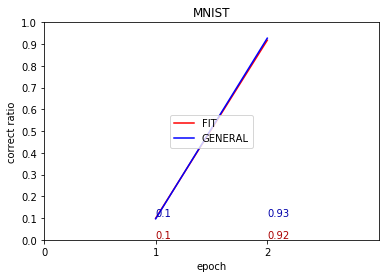

[0.09902, 0.91778]
[0.0967, 0.9272]


In [8]:
plt.xticks(np.arange(0, len(result_fit) + 1, 1))

plt.xlim((0, len(result_fit) + 1))

plt.yticks(np.arange(0, 1.1, 0.1))

plt.ylim((0, 1.0))

plt.plot(range(1, len(result_fit) + 1), result_fit, color = '#ff0000', label = 'FIT')

plt.plot(range(1, len(result_general) + 1), result_general, color = '#0000ff', label = 'GENERAL')

plt.title('MNIST')

plt.ylabel('correct ratio')

plt.xlabel('epoch')

for x in range(0, len(result_fit)):  
    plt.text(x + 1, 0.0, round(result_fit[x], 2), 
             verticalalignment = "bottom", 
             horizontalalignment = "left", 
             fontsize = 10, color = '#aa0000')
    plt.text(x + 1, 0.10, round(result_general[x], 2), 
             verticalalignment = "bottom", 
             horizontalalignment = "left", 
             fontsize = 10, color = '#0000aa')

plt.legend(loc='center')

plt.show()

print(result_fit)

print(result_general)

样本提取区

[0.0000003  0.0001199  0.00006042 0.00000084 0.20201133 0.02515067
 0.07758311 0.00001398 0.0018269  0.00067271]
4
5


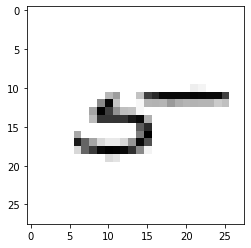

In [11]:
while True :

    sample_Id = int(np.random.rand(1) * len(test_data) )
    
    test_target[sample_Id]

    resu = np.argmax(MLnetwork.feedForward(test_data[sample_Id]))
    
    if(int(test_target[sample_Id]) != resu) : 

        digit = test_data[sample_Id]

        digit_image = digit.reshape(28, 28)

        plt.imshow(digit_image, cmap = plt.cm.binary, interpolation="nearest")

        plt.axis("on")

        print(MLnetwork.feedForward(test_data[sample_Id]))

        print(resu)

        print(test_target[sample_Id])

        break

